In [43]:
import numpy as np
import numpy.linalg as nplin
import scipy.linalg as cplin
import scipy.optimize as opt
#Load data 
problem=1;
A=np.load("P"+str(problem)+"A.npy");
b=np.load("P"+str(problem)+"b.npy");
c=np.load("P"+str(problem)+"c.npy");
#Set parameters
mu=100; gamma=0.9; eps_mu=1e-4; 
#Set initial guess x_0/s_0
m1=10; m2=10; M=m1+m2;
x_0=np.zeros([n,1]);
x_0[:-M]=1/m1/M
x_0[-M:]=1/M;
s_0=np.divide(mu*np.ones([n,1]),x_0)
AT=np.transpose(A)
x=np.array(x_0)
while (mu>eps_mu):
    X=np.diag(x.flatten());
    AX=np.matmul(A,X)
    X2=np.matmul(X,X)
    AX2=np.matmul(AX,X)
    AX2AT=np.matmul(AX2,np.transpose(A))
    dy=nplin.solve(AX2AT,-mu*np.matmul(A,x)+np.matmul(AX2,c))
    dx=np.array(x+(1/mu)*np.matmul(X2,np.matmul(AT,dy)-c))
    def obj(h):
        out=np.matmul(np.transpose(c),x+h*dx)-mu*np.sum(np.log(x+h*dx))
        return out[0][0]
    h=opt.minimize(obj,1)
    x=np.array(x+h.x*dx)
    print(np.matmul(np.transpose(c),x))
    mu=gamma*mu

[[1.29622779]]
[[1.29622584]]
[[1.29622366]]
[[1.29622125]]
[[1.29621856]]
[[1.29621558]]
[[1.29621227]]
[[1.29620859]]
[[1.2962045]]
[[1.29619996]]
[[1.29619491]]
[[1.2961893]]
[[1.29618307]]
[[1.29617614]]
[[1.29616845]]
[[1.2961599]]
[[1.2961504]]
[[1.29613985]]
[[1.29612812]]
[[1.29611509]]
[[1.29610062]]
[[1.29608454]]
[[1.29606667]]
[[1.29604682]]
[[1.29602476]]
[[1.29600025]]
[[1.29597303]]
[[1.29594278]]
[[1.29590917]]
[[1.29587184]]
[[1.29583036]]
[[1.29578428]]
[[1.29573309]]
[[1.29567622]]
[[1.29561304]]
[[1.29554286]]
[[1.29546489]]
[[1.29537829]]
[[1.29528209]]
[[1.29517524]]
[[1.29505658]]
[[1.29492477]]
[[1.2947784]]
[[1.2946158]]
[[1.29443526]]
[[1.29423479]]
[[1.2940122]]
[[1.29376506]]
[[1.29349069]]
[[1.29318612]]
[[1.2928481]]
[[1.2924729]]
[[1.29205657]]
[[1.29159465]]
[[1.29108222]]
[[1.29051385]]
[[1.28988358]]
[[1.28918478]]
[[1.28841023]]
[[1.28755192]]
[[1.28660108]]
[[1.28554809]]
[[1.28438238]]
[[1.28309242]]
[[1.2816656]]
[[1.28008819]]
[[1.27834524]]
[[1.2

In [44]:
qs=np.load("P1q.npy")
q1=qs[0]
q2=qs[1]

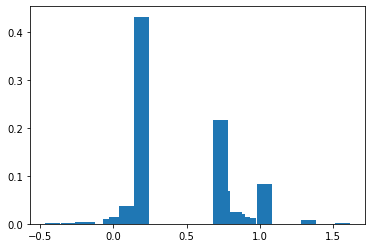

In [48]:
import matplotlib.pyplot as plt

plt.bar(np.concatenate([q1,q2]),x[-M:,0],width=0.1)
plt.savefig("P1_central_path")